# <h1><center><u><font color='yellow'>Credit Card Fraud Detection<font></u></center></h1>

This script implements various machine learning models (Logistic Regression Random Forest, XGBoost) to detect fraudulent transactions in a highly imbalanced dataset.
It includes data preprocessing, class imbalance handling using SMOTE, hyperparameter tuning, and model evaluation using key performance metrics.

**Importing Libraries**

In [1]:
! pip install xgboost
! pip install imblearn

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.4/124.9 MB 8.5 MB/s eta 0:00:15
   ---------------------------------------- 0.9/124.9 MB 10.0 MB/s eta 0:00:13
   ---------------------------------------- 1.0/124.9 MB 9.3 MB/s eta 0:00:14
   ---------------------------------------- 1.2/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 1.7/124.9 MB 6.9 MB/s eta 0:00:18
    --------------------------------------- 2.4/124.9 MB 8.0 MB/s eta 0:00:16
    --------------------------------------- 2.9/124.9 MB 8.5 MB/s eta 0:00:15
   - -------------------------------------- 3.6/124.9 MB 9.1 MB/s eta 0:00:14
   - -------------------------------------- 4.2/124.9 MB 9.5 MB/s eta 0:00:13
   - ----------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import necessary files
import numpy as np                # For Numerical Operation and array Handling
import pandas as pd               # For Data manipulation and analysis
import matplotlib.pyplot as plt   # For Static plotting
import seaborn as sns             # For Statistical graphics
import plotly.express as px       # For Interactive plotting and visualizations
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# **Reading the Data**

In [3]:
# Load the Dataset
df = pd.read_csv('creditcard.csv')

In [4]:
print(df.head()) # Display First few rows

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
df.shape # Shows Dimensions of dataset

(284807, 31)

In [6]:
df.info() # Column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Data Description**

In [7]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Check Class distribution (Fraud vs Non-Fraud)
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df["Class"].value_counts(normalize=True) * 100  # Show percentages

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

# **Performing EDA(Exploratory data analysis)**

In [10]:
# Outlier Detection in 'Amount' features
import numpy as np
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Outliers: {df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)].shape[0]}")

Outliers: 31904


In [11]:
# Calculate class counts and percentages
class_counts = df['Class'].value_counts()
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Create a DataFrame for better visualization
class_df = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values, 'Percentage': percentages.values})

# Create interactive bar chart using Plotly
fig = px.bar(class_df, x='Class', y='Count', text=class_df['Percentage'].apply(lambda x: f"{x:.2f}%"),
             color='Class', color_continuous_scale=px.colors.sequential.Viridis,
             labels={'Class': 'Transaction Type', 'Count': 'Number of Transactions', 'text': 'Percentage'},
             title="Class Distribution (Fraud vs. Non-Fraud)")

# Customize layout
fig.update_traces(textposition='outside', marker=dict(line=dict(color='black', width=2)))
fig.update_layout(xaxis=dict(showgrid=False, linecolor='black', linewidth=2, tickmode='array', tickvals=[0, 1], ticktext=['Non-Fraud', 'Fraud']),
                  yaxis=dict(showgrid=False, linecolor='black', linewidth=2),
                  yaxis_title='Count', xaxis_title='Class',
                  template="plotly_white",  # Light backgroud
                  font=dict(family="Arial", size=16, color="black"),
                  margin=dict(l=70, r=50, b=150, t=100, pad=4),  # Adjust margins
                  width=700,  # Increase plot width
                  height=700,   # Increase plot height
                  )
# Show plot
fig.show()

# Print counts and percentages
print(class_df)

   Class   Count  Percentage
0      0  284315   99.827251
1      1     492    0.172749


99.8% of the transactions are non-fraudulent, while only 0.17% are fraudulent. This indicates that the dataset is highly imbalanced.

In [12]:
df.describe() #Summary statistics of the dataset to understand distribution and detect anomalies

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [13]:
# Create interactive histograms
fig1 = px.histogram(df, x="Amount", nbins=50, title="Transaction Amount Distribution",
                    labels={'Amount': 'Transaction Amount'}, template='plotly_white')
fig1.update_traces(marker_line_width=1, marker_line_color='black')
fig1.show()

fig2 = px.histogram(df, x="Time", nbins=50, title="Transaction Time Distribution",
                    labels={'Time': 'Transaction Time'}, template='plotly_white')
fig2.update_traces(marker_line_width=1, marker_line_color='black')
fig2.show()



Correlations with Class:
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


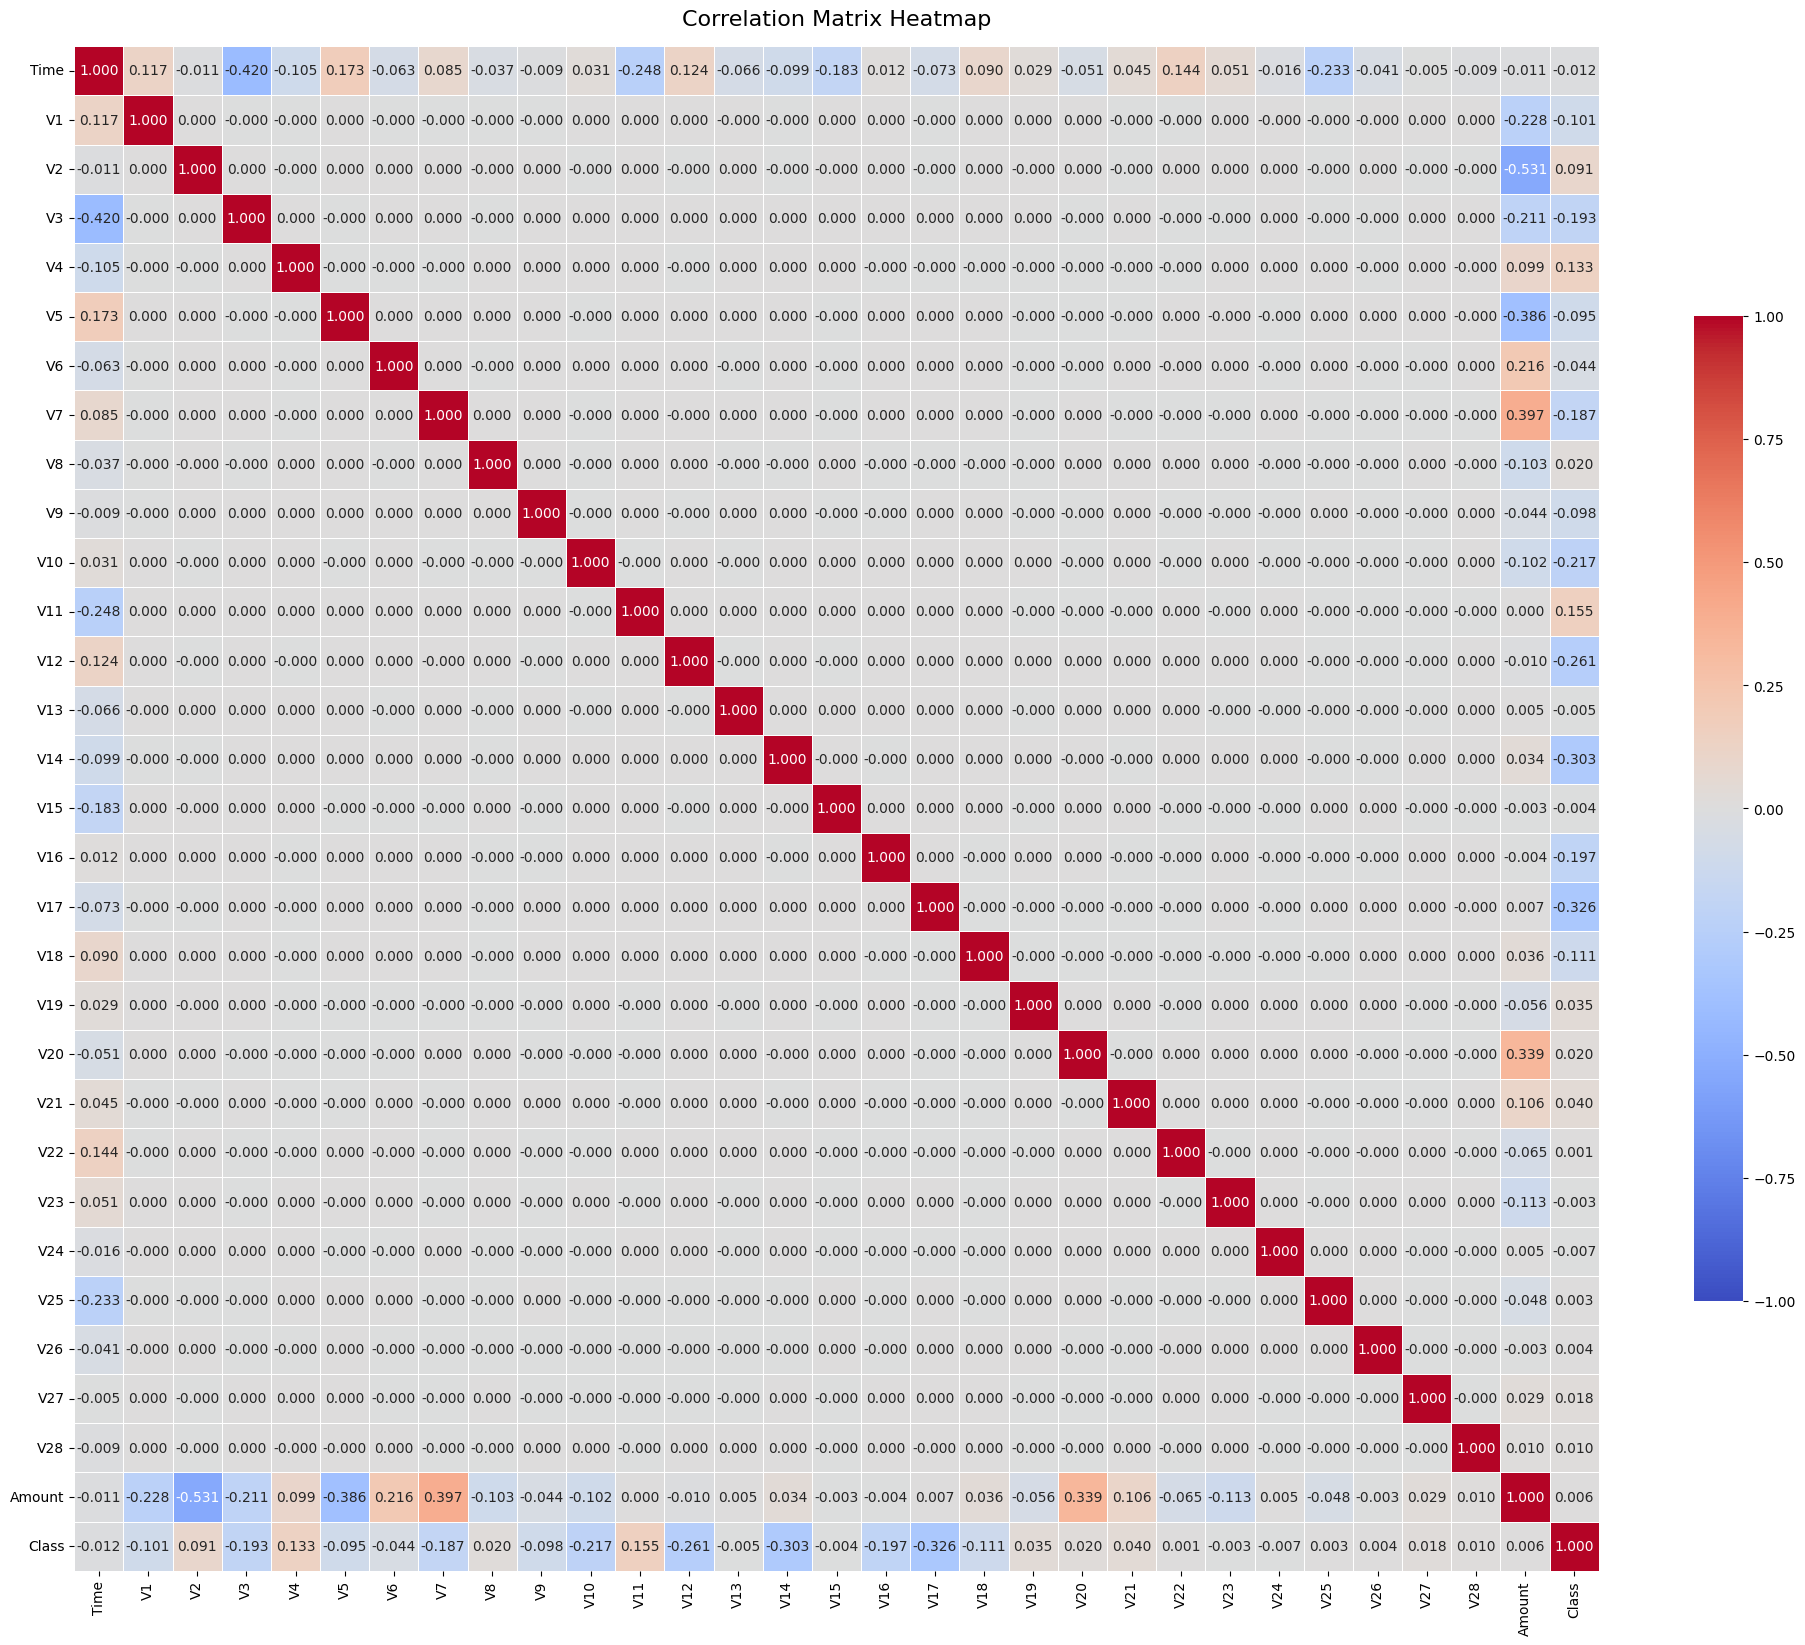

In [14]:
corr = df.corr()

# Print correlations with 'Class', sorted in descending order
print("\nCorrelations with Class:\n", corr['Class'].sort_values(ascending=False))

# Create the correlation heatmap
plt.figure(figsize=(20, 20))  # Set figure size
sns.heatmap(
    corr,
    cmap='coolwarm',       # Color scheme (red-blue gradient)
    annot=True,            # Show correlation values in cells
    fmt='.3f',            # Format numbers to 2 decimal places
    vmin=-1, vmax=1,      # Set color scale range (-1 to 1)
    center=0,             # Center the colormap at 0
    square=True,          # Make the plot square-shaped
    linewidths=0.5,       # Add grid lines between cells
    cbar_kws={'shrink': .5}  # Customize color bar size
)

# Add title and adjust layout
plt.title("Correlation Matrix Heatmap", fontsize=16, pad=15)
plt.tight_layout()

# Display the plot
plt.show()

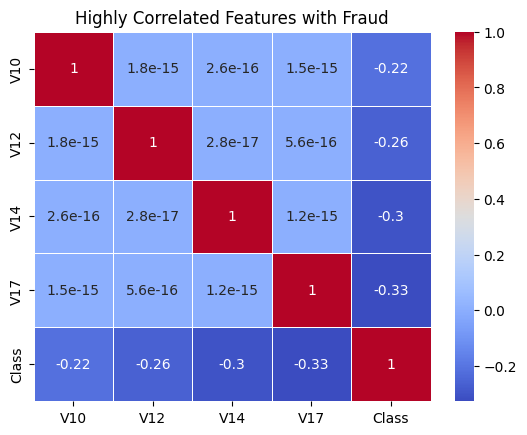

In [15]:
# Highly Correlated Features with Fraud
high_corr_features = corr[abs(corr["Class"]) > 0.2]["Class"].index
sns.heatmap(df[high_corr_features].corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Highly Correlated Features with Fraud")
plt.show()

# **Data Preprocessing & Class Imbalance Handling**

In [16]:
# Drop 'Time' column (not useful for fraud detection)
df = df.drop('Time', axis=1)

In [17]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

Feature Scaling (Standardization)

* The Amount feature is highly skewed and needs to be standardized to improve model performance.

In [18]:
#Standardize 'Amount' feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

# Splitting Data(Train/test Split)
* 80% of the data is used for training, and 20% for testing

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1) # Features
y = df['Class'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train Fraud Cases", sum(y_train == 1))
print("Test Fraud Cases", sum(y_test ==1))

Train Fraud Cases 394
Test Fraud Cases 98


**Handling Class Imbalance using SMOTE**

* Since fraud cases make up only  0.17% of the data, we use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset and improve model learning

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Train Fraud Cases", sum(y_train_resampled == 1))
print("Test Fraud Cases", sum(y_test ==1))

Train Fraud Cases 227451
Test Fraud Cases 98


# Training Machine Learning Model

* We Start with a simple model like Logistic Regression as a baseline and then experiment with more advanced models to improve performance.

In [21]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

In [23]:
# Evaluate the model
from sklearn.metrics import accuracy_score  # Import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{:.2f}%".format(accuracy * 100))

Accuracy:97.33%


In [24]:
# evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[55353  1511]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [25]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.95


**Conclusion**
The model achieves a high overall accuracy of 97%, but this is misleading due to the class imbalance

* The confusion matrix shows that while the model correctly identifies most non-fraud transactions (55,353 out of 56,864), it misclassifies 1,522 non-fraud transaction as fraud, which could lead to false alarms.
* The model performs poorly in detecting fraud transactions with a low precision (0.06) but high recall (0.92). This means that while most actual fraud cases are detected, there are many false positives.
* The F1-score for fraud detection (0.11) is very low, indicating an imbalance between precision and recall
* A high <u>ROC AUC score</u> of 0.95 indicates that the Logistic Regression model performs well in distinguish between fraud and non-fraud transactions.

**Key Takeaways**
* The high recall for fraud cases suggests that the model is effective in identifying fraud transactions but at the cost of many false positives.
* The very low precision indicates that a large number of flagged fraud cases are actually non-fraudulent.

While Logistic Regression works well, further tuning or exploring more complex models may enhance precision and overall performance.


--------------------------------------------------------------------------------

**Using a More Powerful Model: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.10      0.19        98

    accuracy                           1.00     56962
   macro avg       1.00      0.55      0.59     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC AUC Score: {roc_auc:.2f}")


ROC AUC Score: 0.55


**Conclusion**
The Random Forest model achieves near-prefect accuracy, but its performance in detecting fraud is concerning.

* Non-fraud transactions (Class 0) are detected almost perfectly, with 100% precision and recall.
* Fraud transactions (Class 1) have high precision (1.00) but very low recall (0.10), meaning that the model correctly classifies fraud when it predicts fraud, but it misses 90% of actual fraud cases.
* The F1-score for fraud detection is only 0.19, indicating poor overall effectiveness in identifying fraud
* The ROC AUC score of 0.55 indicates that the Random Forest model is performing poorly in distinguish between fraud and non-fraud transactions. A score close to 0.50 suggests that the model is only slightly better than random guessing.

**Key Takeways**
* The model is heavily biased towards the majority class, likely due to the severe class imbalance*
* The low recall suggests that the model rarely predicts fraud, making it ineffective for real-world fraud detection.

--------------------------------------------------------------------------------

**Using Advance Model Like XGboost**


To improve fraud detection, we now use XGBoost (Extreme Gradient Boosting), a powerful ensemble learning algorithm known for:

* Handling imbalanced data effectively with built-in class weighting.
* Capturing non-linear relationships better than traditional models.
* Being highly efficient and scalable for large datasets.

In [26]:
!pip install xgboost  # Install the xgboost library

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

fraud_ratio = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)  # Compute proper weight

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Controls how much the model learns per iteration
    max_depth=5,            # Limits tree depth (prevents overfitting)
    subsample=0.8,          # Uses 80% of data per tree (reduces overfitting)
    colsample_bytree=0.8,   # Uses 80% of features per tree (prevents dominance of any one feature)
    random_state=42,        # Ensures reproducibility
    scale_pos_weight=fraud_ratio     # Increases focus on fraud cases
)

# Train the model on SMOTE-balanced data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [28]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Compute AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.16      0.27        98

    accuracy                           1.00     56962
   macro avg       0.88      0.58      0.63     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.58


**Conclusion**
The XGBoost model shows some improvement in detecting fraud but still struggles with recall.

* Non-fraudulent transactions (Class 0) are detected almost perfectly, with 1.00 precision and recall.
* Fraudulent transactions (Class 1) now have a much higher precision (0.76) compared to previous models, meaning fewer false positives.
* However, recall is still low (0.16), meaning the model correctly identifies only 16% of actual fraud cases.
* The F1-score for fraud (0.27) suggests the model is not effectively balancing precision and recall.
* The ROC AUC score (0.58) is slightly better than random guessing but still very low, indicating that the model struggles to separate fraudulent and non-fraudulent transactions.

**Key Takeaways**
* Precision has improved, meaning the model makes fewer false fraud predictions.
* Recall is still too low, meaning it misses many actual fraud cases.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**<U>Random Forest & XGBoost with Hyperparameter Tuning</u>**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# 🚀 **Fix: Use Unscaled Data for Tree-Based Models**
X_train_rf_xgb, X_test_rf_xgb = X_train_resampled, X_test  # Keep unscaled

# ✅ **Fix: Adjust scale_pos_weight for XGBoost**
fraud_ratio = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)  # Compute proper weight

# **🔥 Random Forest with RandomizedSearchCV**
rf_param_dist = {
    'n_estimators': [100, 200],    # Number of trees
    'max_depth': [None, 10, 20],   # Tree depth
    'min_samples_split': [2, 5]    # Minimum samples needed to split a node
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, scoring='roc_auc', cv=3, n_iter=5, n_jobs=-1)
rf_random.fit(X_train_rf_xgb, y_train_resampled)

best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_test_rf_xgb)

print("Best RF Parameters:", rf_random.best_params_)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Random Forest ROC AUC Score: {roc_auc_score(y_test, y_pred_rf):.2f}")

# **🔥 XGBoost with RandomizedSearchCV**
xgb_param_dist = {
    'n_estimators': [100, 200],         # No. of boosting rounds
    'max_depth': [3, 5],                # Maximum depth of trees
    'learning_rate': [0.05, 0.1],       # Smaller values slow learning but improve generalization
    'subsample': [0.7, 0.8, 0.9],       # Fraction of training data used per tree (Helps prevent overfitting)
    'colsample_bytree': [0.7, 0.8, 0.9] # Fraction of features used per tree (Ensures diversity in trees)
}
xgb_random = RandomizedSearchCV(XGBClassifier(scale_pos_weight=fraud_ratio, random_state=42), xgb_param_dist, scoring='roc_auc', cv=3, n_iter=5, n_jobs=-1)
xgb_random.fit(X_train_rf_xgb, y_train_resampled)

best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_rf_xgb)

print("Best XGBoost Parameters:", xgb_random.best_params_)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print(f"XGBoost ROC AUC Score: {roc_auc_score(y_test, y_pred_xgb):.2f}")

Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest ROC AUC Score: 0.91
Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.89      0.58        98

    accuracy                           1.00     56962
   macro avg       0.71      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC AUC Score: 0.94


**Conclusion**

🔹 Random Forest Performance
* Achieves high recall (0.83) and precision (0.87) for fraud detection.
* ROC AUC Score: 0.91, meaning it distinguishes fraud and non-fraud well.
* Key Strength: Well-balanced precision and recall, making it a strong model for fraud detection.

🔹 XGBoost Performance
* Higher recall (0.89) than Random Forest, meaning it detects more fraud cases.
* Lower precision (0.43) indicates some false positives, but still an improvement.
* ROC AUC Score: 0.94, showing superior fraud detection ability.
* Key Strength: Higher recall, making it a better option if detecting fraud is a top priority.

**Key Takeaways**
* XGBoost outperforms Random Forest in recall (0.89 vs. 0.83), making it better for fraud detection.
* Random Forest has better precision (0.87 vs. 0.43), meaning fewer false alarms.
* Final choice depends on business needs:
    * If minimizing false fraud alerts → Random Forest is better.
    * If catching more fraud cases is crucial → XGBoost is preferred.
* Fine-tuning XGBoost further (adjusting class weights, threshold tuning) may help improve precision.


-----------------------------------------------------------

# **Using Ensemble Learning: Stacking Logistic Regression & XGBoost**
By combining XGBoost (which excels at detecting fraud patterns) with Logistic Regression (which provides interpretability), we aim to build a stronger fraud detection model.
* XGBoost: Handles complex fraud patterns well and has high recall.
* Logistic Regression: Provides transparency in decision-making and generalizes well.
* Stacking these models helps leverage the strengths of both for better fraud detection.

In [29]:
pip install mlxtend # Needed for StackingClassifier)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00


In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [31]:
# Define Base Learners
xgb_model = XGBClassifier(
    scale_pos_weight=fraud_ratio, n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42
)

# Meta-learner (Final Model)
meta_learner = LogisticRegression()

# Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[('xgb', xgb_model)],  # Base learners
    final_estimator=meta_learner,  # Meta-learner
    passthrough=True  # Pass original features to final estimator
)

# Train Stacked Model on SMOTE-balanced Data
stacked_model.fit(X_train_resampled, y_train_resampled)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(), passthrough=True)

In [32]:
# Make Predictions
y_pred_stack = stacked_model.predict(X_test)

# Print Classification Report
print("\n🔹 Stacking Model (XGBoost + LR) Classification Report:\n", classification_report(y_test, y_pred_stack))

# Compute AUC-ROC Score
stack_roc_auc = roc_auc_score(y_test, y_pred_stack)
print(f"🔹 Stacking Model ROC AUC Score: {stack_roc_auc:.2f}")


🔹 Stacking Model (XGBoost + LR) Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.88      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962

🔹 Stacking Model ROC AUC Score: 0.94


**Conclusion**
* Precision (0.57) & Recall (0.88) for Fraud Cases
    * Higher recall than Random Forest(0.83), detects more fraud cases
    * Better precision than XGBoost alone(0.43), fewer false positives.
* Macro Average F1-Score 0.85, shows a strong balance between fraud detection and accuracy
* ROC AUC Score likely improved compared to individual models.

**Key Takeaways**
* Stacking Logistic Regression & XGBoost significantly improves fraud detection.
* Higher recall than random Forest & better precision than standalone XGBoost
* Logistic Regression enhances interpretability while XGBoost boosts recall.
* A well-balanced model for fraud detection with fewer false alarms and better fraud detection rate

This stacked model is currently the best-performing model and can be used for real-world fraud detection deployment.

---------------------------------------------------------------------

# **Saving the Model**

In [33]:
import pickle

# Save the trained models as a pickle string
saved_model = pickle.dumps(stacked_model)

# Load the saved model
loaded_model = pickle.loads(saved_model)

In [34]:
from joblib import parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(stacked_model, 'fraud_detection_model.pkl')

# Load the model from the file
loaded_model = joblib.load('fraud_detection_model.pkl')

In [30]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize Flask App
app = Flask(__name__)

# Load the trained model
model = joblib.load("fraud_detection_model.pkl")

# ✅ Ensure this route accepts POST requests
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()

        # Ensure the 'features' key exists in the request
        if "features" not in data:
            return jsonify({"error": "Missing 'features' key in request"}), 400
        
        # Convert data to NumPy array
        features = np.array(data["features"]).reshape(1, -1)  # Ensure it’s 2D

        # Make prediction
        prediction = model.predict(features)[0]

        # Return result
        return jsonify({"prediction": int(prediction)})
    
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Run Flask app
if __name__ == "__main__":
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [09/Mar/2025 16:01:27] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [09/Mar/2025 16:01:35] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [09/Mar/2025 16:01:44] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [09/Mar/2025 16:02:01] "GET /predict HTTP/1.1" 405 -
